In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
pd.set_option('display.max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [3]:
df.drop(['_c39'], axis = 1, inplace = True)

Dropping irrelevant column as it has all null values

In [6]:
import numpy as np

df = df.replace('?',np.NaN)
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

However there is no null value, but '?' is appearing the data, hence we have replaced ? with null value and now we are getting null values in 3 columns

In [7]:
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

df['property_damage'].fillna('NO', inplace = True)

df['police_report_available'].fillna('NO', inplace = True)

We are filling missing values of these 3 columns :-

1) we are updating the most common value of collision_type in the null values.

2) In case of blank property_damage, NO value is updated with property_damage.

3) Again, in case of blank police_report_available, NO value is updated with police_report_available.

In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Data Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

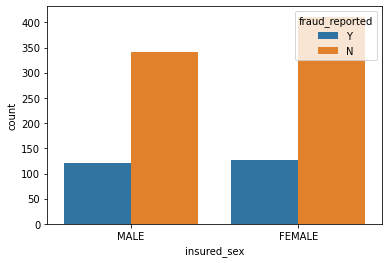

In [43]:
sns.countplot (x = 'insured_sex', data = df, hue = 'fraud_reported')

Fraud reported is equally distributed as per gender in the dataset

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

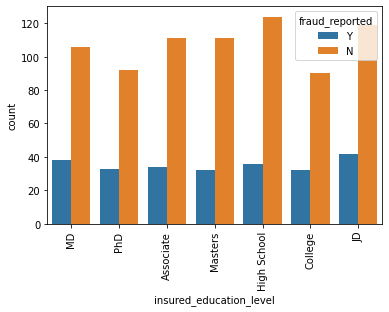

In [44]:
sns.countplot (x = 'insured_education_level', data = df, hue = 'fraud_reported')
plt.xticks(rotation = 90)

Fraud reported w.r.t. education level is also equally distributed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

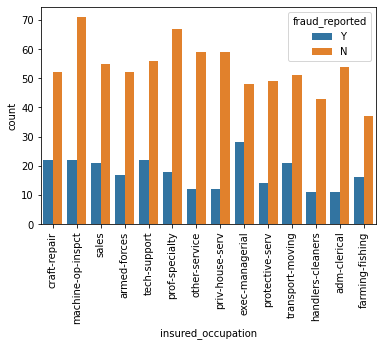

In [45]:
sns.countplot (x = 'insured_occupation', data = df, hue = 'fraud_reported')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

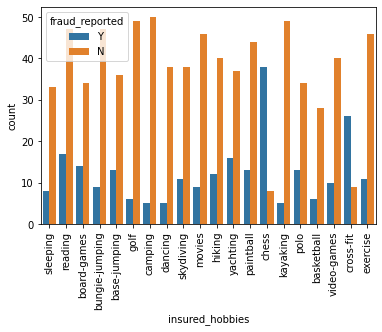

In [46]:
sns.countplot (x = 'insured_hobbies', data = df, hue = 'fraud_reported')
plt.xticks(rotation = 90)

Customer having chess as hobbies are doing fraud most

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

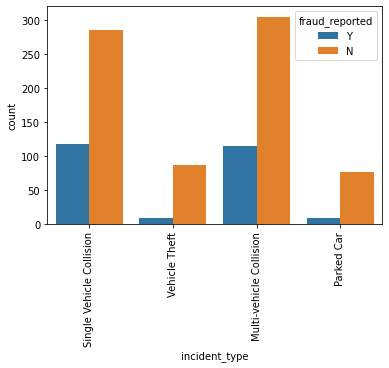

In [47]:
sns.countplot (x = 'incident_type', data = df, hue = 'fraud_reported')
plt.xticks(rotation = 90) 

Frauds are high where incidents are Single Vehicle & Multi vehicle collision

<AxesSubplot:xlabel='collision_type', ylabel='count'>

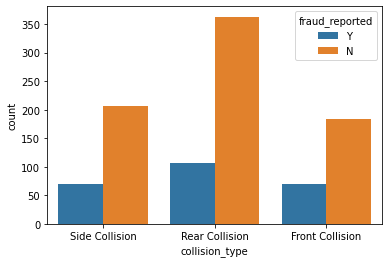

In [49]:
sns.countplot (x = 'collision_type', data = df, hue = 'fraud_reported')

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

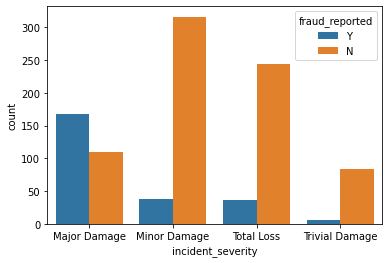

In [50]:
sns.countplot (x = 'incident_severity', data = df, hue = 'fraud_reported')

Frauds are high where severity are Major Damage

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

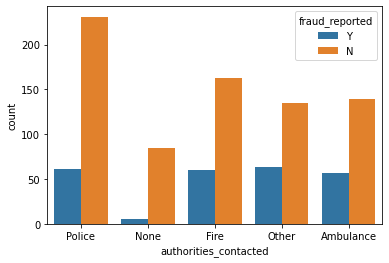

In [51]:
sns.countplot (x = 'authorities_contacted', data = df, hue = 'fraud_reported')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

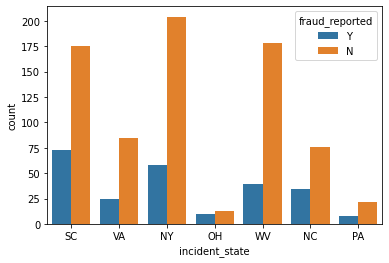

In [52]:
sns.countplot (x = 'incident_state', data = df, hue = 'fraud_reported')

Frauds are high in state SC

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

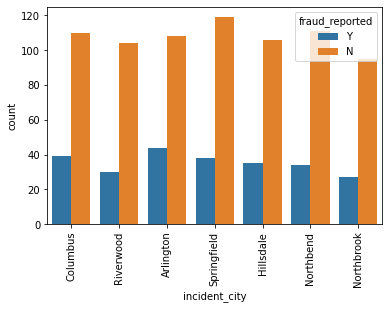

In [54]:
sns.countplot (x = 'incident_city', data = df, hue = 'fraud_reported')
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

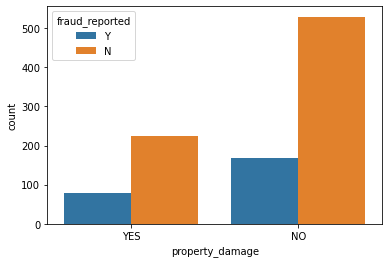

In [55]:
sns.countplot (x = 'property_damage', data = df, hue = 'fraud_reported')

Fraud claims are high when property is not damaged

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

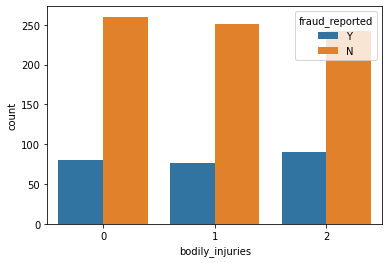

In [56]:
sns.countplot (x = 'bodily_injuries', data = df, hue = 'fraud_reported')

<AxesSubplot:xlabel='witnesses', ylabel='count'>

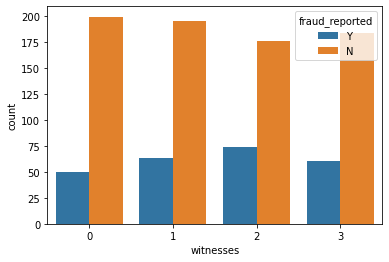

In [57]:
sns.countplot (x = 'witnesses', data = df, hue = 'fraud_reported')

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

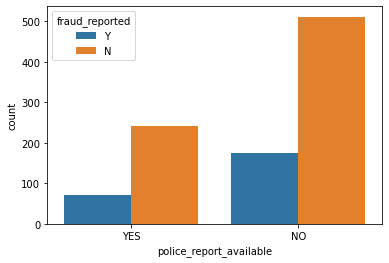

In [58]:
sns.countplot (x = 'police_report_available', data = df, hue = 'fraud_reported')

Fraud reported are high when there is no Police Report available

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

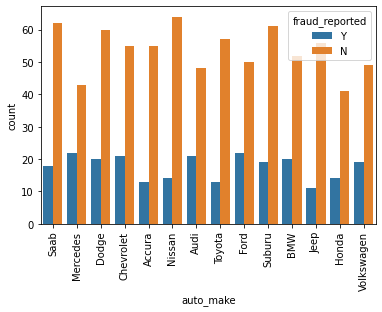

In [62]:
sns.countplot (x = 'auto_make', data = df, hue = 'fraud_reported')
plt.xticks(rotation = 90)

In [8]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['policy_state'] = le.fit_transform( df['policy_state'] )
df['policy_csl'] = le.fit_transform( df['policy_csl'] )
df['insured_sex'] = le.fit_transform( df['insured_sex'] )
df['insured_education_level'] = le.fit_transform( df['insured_education_level'] )
df['insured_occupation'] = le.fit_transform( df['insured_occupation'] )
df['insured_hobbies'] = le.fit_transform( df['insured_hobbies'] )
df['insured_relationship'] = le.fit_transform( df['insured_relationship'] )
df['incident_type'] = le.fit_transform( df['incident_type'] )
df['collision_type'] = le.fit_transform( df['collision_type'] )
df['incident_severity'] = le.fit_transform( df['incident_severity'] )
df['authorities_contacted'] = le.fit_transform( df['authorities_contacted'] )
df['incident_state'] = le.fit_transform( df['incident_state'] )
df['incident_city'] = le.fit_transform( df['incident_city'] )
df['property_damage'] = le.fit_transform( df['property_damage'] )
df['police_report_available'] = le.fit_transform( df['police_report_available'] )
df['auto_make'] = le.fit_transform( df['auto_make'] )
df['fraud_reported'] = le.fit_transform( df['fraud_reported'] )

df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,2004,1,1,25
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,2007,1,1,21
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,2007,0,2,22
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,2014,1,10,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,2009,0,2,17


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int32  
 12  insured_relationship         1000 non-null   int32  
 13  capital-gains      

# Model Selection

In [10]:
x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42)

# 1. LogisiticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

logreg = LogisticRegression()

logreg.fit( x_train, y_train )
logreg_predict = logreg.predict (x_test)

print('Classification Report with LogisticRegression :', "\n",  classification_report(y_test,logreg_predict))
print('Accuracy with LogisticRegression : ', accuracy_score(logreg_predict,y_test) , "\n")
print('Confusion Matrix with LogisticRegression : ', "\n", confusion_matrix(logreg_predict,y_test), "\n")

Classification Report with LogisticRegression : 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200

Accuracy with LogisticRegression :  0.725 

Confusion Matrix with LogisticRegression :  
 [[145  55]
 [  0   0]] 



# 2. RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier( max_depth = 16, min_samples_leaf = 1, min_samples_split = 2,
                             n_estimators = 100, random_state = 12345)

rfc.fit( x_train, y_train )
rfc_pred = rfc.predict(x_test)

print('Classification Report with RandomForestClassifier :', "\n",  classification_report(y_test,rfc_pred))
print('Accuracy with RandomForestClassifier : ', accuracy_score(rfc_pred,y_test) , "\n")
print('Confusion Matrix with RandomForestClassifier : ', "\n", confusion_matrix(rfc_pred,y_test), "\n")
print('roc_auc_score with RandomForestClassifier: ', roc_auc_score(rfc_pred,y_test))

Classification Report with RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       145
           1       0.62      0.33      0.43        55

    accuracy                           0.76       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.74      0.76      0.73       200

Accuracy with RandomForestClassifier :  0.76 

Confusion Matrix with RandomForestClassifier :  
 [[134  37]
 [ 11  18]] 

roc_auc_score with RandomForestClassifier:  0.7021576930832829


# 3. DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier( max_depth=3, min_samples_leaf = 35 )
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,dtc_pred))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(dtc_pred,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(dtc_pred,y_test), "\n")
print('roc_auc_score with DecisionTreeClassifier: ', roc_auc_score(dtc_pred,y_test))

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       145
           1       0.72      0.75      0.73        55

    accuracy                           0.85       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.85      0.85      0.85       200

Accuracy with DecisionTreeClassifier :  0.85 

Confusion Matrix with DecisionTreeClassifier :  
 [[129  14]
 [ 16  41]] 

roc_auc_score with DecisionTreeClassifier:  0.8106980738559686


# 4. XGBClassifier

In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier( n_estimators = 500, max_depth = 16)

xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print('Classification Report with XGBClassifier :', "\n",  classification_report(y_test,xgb_pred))
print('Accuracy with XGBClassifier : ', accuracy_score(xgb_pred,y_test) , "\n")
print('Confusion Matrix with XGBClassifier : ', "\n", confusion_matrix(xgb_pred,y_test), "\n")
print('roc_auc_score with XGBClassifier: ', roc_auc_score(xgb_pred,y_test))

[14:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report with XGBClassifier : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       145
           1       0.64      0.64      0.64        55

    accuracy                           0.80       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.80      0.80      0.80       200

Accuracy with XGBClassifier :  0.8 

Confusion Matrix with XGBClassifier :  
 [[125  20]
 [ 20  35]] 

roc_auc_score with XGBClassifier:  0.7492163009404388


# 5. AdaBoostClassifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)

adaboost_pred = adaboost.predict(x_test)

print('Classification Report with AdaBoostClassifier :', "\n",  classification_report(y_test,adaboost_pred))
print('Accuracy with AdaBoostClassifier : ', accuracy_score(adaboost_pred,y_test) , "\n")
print('Confusion Matrix with AdaBoostClassifier : ', "\n", confusion_matrix(adaboost_pred,y_test), "\n")
print('roc_auc_score with AdaBoostClassifier: ', roc_auc_score(adaboost_pred,y_test))

Classification Report with AdaBoostClassifier : 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       145
           1       0.55      0.38      0.45        55

    accuracy                           0.74       200
   macro avg       0.67      0.63      0.64       200
weighted avg       0.72      0.74      0.73       200

Accuracy with AdaBoostClassifier :  0.745 

Confusion Matrix with AdaBoostClassifier :  
 [[128  34]
 [ 17  21]] 

roc_auc_score with AdaBoostClassifier:  0.671377517868746


# Saving the model

In [17]:
import pickle
filename = 'insurance_fraud_claim.pkl'
pickle.dump ( dtc, open ( filename, 'wb'))

Saving the model with DecisionTreeClassifier as the accuracy is 85 % the greatest among all the other models

In [18]:
filename = 'insurance_fraud_claim.pkl'
loaded_model = pickle.load( open (filename, 'rb') )
result = loaded_model.score(x_test, y_test)
print(result)

0.85
